In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

data = pd.read_csv('/content/healthcare-dataset.zip')
data.head()
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [2]:
data=data.drop(columns=['Name','Doctor','Hospital','Date of Admission','Discharge Date'])
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,205,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal


In [3]:
x=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

In [4]:
x.shape
y.shape

(55500,)

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [16]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 1] = le.fit_transform(x[:, 1])
x[:,1]'''

array([18148., 33218., 27375., ..., 27043., 32001.,  3057.])

In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


categorical_columns = ['Gender','Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


one_hot_encoder = OneHotEncoder(sparse=False, drop='first')


df_encoded_onehot = one_hot_encoder.fit_transform(data[categorical_columns])


encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
df_encoded_onehot = pd.DataFrame(df_encoded_onehot, columns=encoded_columns)


x = pd.concat([data.drop(columns=categorical_columns), df_encoded_onehot], axis=1)


print(x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       Age  Billing Amount  Room Number  Gender_Male  Blood Type_A-  \
0       30    18856.281306          328          1.0            0.0   
1       62    33643.327287          265          1.0            0.0   
2       76    27955.096079          205          0.0            1.0   
3       28    37909.782410          450          0.0            0.0   
4       43    14238.317814          458          0.0            0.0   
...    ...             ...          ...          ...            ...   
55495   42     2650.714952          417          0.0            0.0   
55496   61    31457.797307          316          0.0            0.0   
55497   38    27620.764717          347          0.0            0.0   
55498   43    32451.092358          321          1.0            0.0   
55499   53     4010.134172          448          0.0            0.0   

       Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
0                 0.0             0.0            0.0            1.0   
1    

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
sd=StandardScaler()
ss=MinMaxScaler()
no=Normalizer()
x=sd.fit_transform(x)
x

array([[-1.09882435, -0.47026116,  0.23311956, ..., -0.49909894,
        -0.70298278,  1.41323946],
       [ 0.53363905,  0.57025016, -0.31355599, ..., -0.49909894,
         1.42250994, -0.70759417],
       [ 1.24784178,  0.16998976, -0.83419937, ..., -0.49909894,
        -0.70298278,  1.41323946],
       ...,
       [-0.6907085 ,  0.14646406,  0.39798996, ..., -0.49909894,
        -0.70298278, -0.70759417],
       [-0.43563609,  0.48635687,  0.17237783, ..., -0.49909894,
        -0.70298278, -0.70759417],
       [ 0.07450872, -1.51493121,  1.27440631, ..., -0.49909894,
        -0.70298278, -0.70759417]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)
X_train.shape
X_test.shape

(11100, 28)

In [37]:
print(X_train.dtype)
print(y_train.dtype)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_test = label_encoder.fit_transform(y_test)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

float32
float32


In [38]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [40]:

hello = tf.constant('Hello, Tensorflow!')
print(hello)
u = tf.constant(10)
print(u)

tf.Tensor(b'Hello, Tensorflow!', shape=(), dtype=string)
tf.Tensor(10, shape=(), dtype=int32)


In [41]:
import numpy as np

matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype = 'int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype = 'int32')

print (matrix1)
print (matrix2)

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1,matrix2)
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype = 'float32')
print (matrix_3)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]


In [42]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense # input, hidden, output
from keras.activations import softmax, sigmoid, relu, tanh, softplus
from keras.optimizers import SGD, Adam, RMSprop, Nadam, Adamax
from keras.losses import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy

In [43]:
model = Sequential()
# input layer==> activation, neurons
# hidden layer
# output layer

model.add(Dense(512, activation='relu'))

model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']  )
history = model.fit(x=X_train, y=y_train, epochs=5, batch_size=100, validation_data= (X_test, y_test) )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6072 - loss: -3.4878 - val_accuracy: 0.6691 - val_loss: -12.3867
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6651 - loss: -16.7926 - val_accuracy: 0.6691 - val_loss: -31.6694
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6632 - loss: -38.7912 - val_accuracy: 0.6691 - val_loss: -59.6403
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6628 - loss: -69.2253 - val_accuracy: 0.6691 - val_loss: -96.2254
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6626 - loss: -108.2525 - val_accuracy: 0.6691 - val_loss: -141.5312


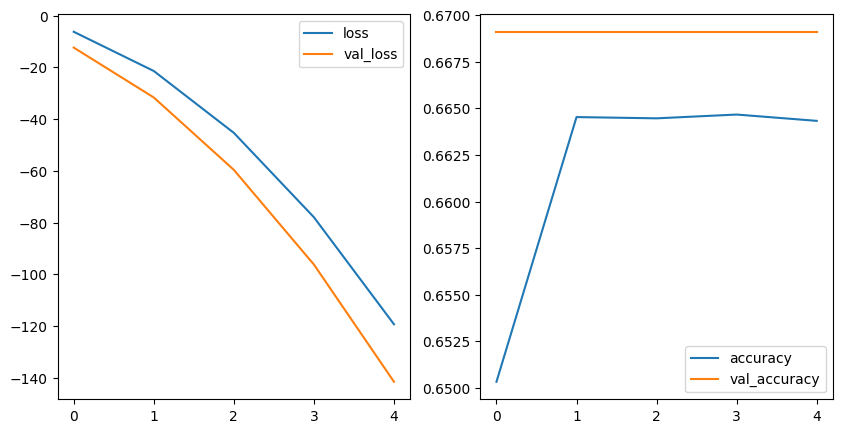

In [44]:
import matplotlib.pyplot as plt
def plot_loss_and_accuracy(history: keras.callbacks.History):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
plot_loss_and_accuracy(history)

In [45]:
model.evaluate(X_test, y_test)

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6714 - loss: -140.5359


[-141.5311737060547, 0.6690990924835205]

In [46]:
model = Sequential()
model.add(Dense( 32, activation= 'relu' )    )
model.add(Dense( 64, activation= 'relu' )    )
model.add(Dropout(0.1))
model.add(Dense( 16, activation= 'relu' )    )
model.add(Dropout(0.1))
model.add(Dense( 8, activation= 'relu' )    )
model.add(Dropout(0.1))
model.add(Dense( 1, activation= 'sigmoid' )    )
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile( optimizer= opt, loss = 'binary_crossentropy',  metrics=['accuracy' ]   )
call = keras.callbacks.EarlyStopping(monitor= 'accuracy', patience=2  )
model.fit(X_train, y_train, epochs=10, callbacks=call, validation_data=(X_test, y_test))

Epoch 1/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3165 - loss: -468323.1250 - val_accuracy: 0.3305 - val_loss: -16031902.0000
Epoch 2/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3318 - loss: -56528540.0000 - val_accuracy: 0.3305 - val_loss: -336680576.0000
Epoch 3/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3325 - loss: -582718400.0000 - val_accuracy: 0.3305 - val_loss: -1736417664.0000
Epoch 4/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3322 - loss: -2451630336.0000 - val_accuracy: 0.3305 - val_loss: -5304575488.0000


In [47]:
model.evaluate(X_test, y_test)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: -5267149824.0000


[-5304575488.0, 0.3305405378341675]

In [48]:
y_pred = model.predict(X_test)
y_pred
from sklearn.metrics import confusion_matrix

347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
tt=tf.keras.optimizers.RMSprop()
model.compile(optimizer=tt, loss='binary_crossentropy', metrics=['accuracy'] )
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)
model.fit(X_train, y_train, epochs = 20, verbose=1, callbacks=callback, validation_steps=10)
model.summary()

Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3290 - loss: -266.9825
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3905 - loss: -41730.1953
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3524 - loss: -615817.3125
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3692 - loss: -3561772.0000


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │             928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,268 (12.77 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,635 (6.39 KB)

In [50]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(56, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
#op = tf.keras.optimizers.Nadam
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy'  , metrics=['accuracy']  )

callback= tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1, steps_per_epoch=10, callbacks=callback)
model.summary()

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2199 - loss: 0.5553
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 0.5567    
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3521 - loss: 0.2942
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3054 - loss: 0.4014
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3350 - loss: 0.3398


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (10, 128)                   │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (10, 56)                    │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (10, 56)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (10, 32)                    │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (10, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (10, 16)                    │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (10, 16)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (10, 8)                     │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (10, 4)                     │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (10, 2)                     │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (10, 1)                     │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,421 (157.90 KB)

 Trainable params: 13,473 (52.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,948 (105.27 KB)

In [51]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [53]:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
#out
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# compile
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics= ['accuracy'] )
#fit
model.fit(X_train,y_train ,epochs=5)

Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3557 - loss: -41565667328.0000
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4826 - loss: -9318508265472.0000
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5021 - loss: -142643900186624.0000
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4931 - loss: -774366631559168.0000
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4904 - loss: -2593516806995968.0000


In [54]:
model.evaluate(X_test,y_test, batch_size=64)

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6289 - loss: -5123662445281280.0000


[-5160782237007872.0, 0.6300901174545288]

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu' ))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=2)

Epoch 1/2
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4239 - loss: -30.1213
Epoch 2/2
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5642 - loss: -498.3440
